In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re

url = 'https://raw.githubusercontent.com/Haeeshart/Python-for-Biologists/refs/heads/main/Global%20difference%20(1).csv'
df = pd.read_csv(url)
df.head()

,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371


In [5]:
numeric_columns = df.columns.drop('Gene')
# Transpose the data (rows = samples, columns = metabolites)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene']  # Optional: set metabolite names as column headers

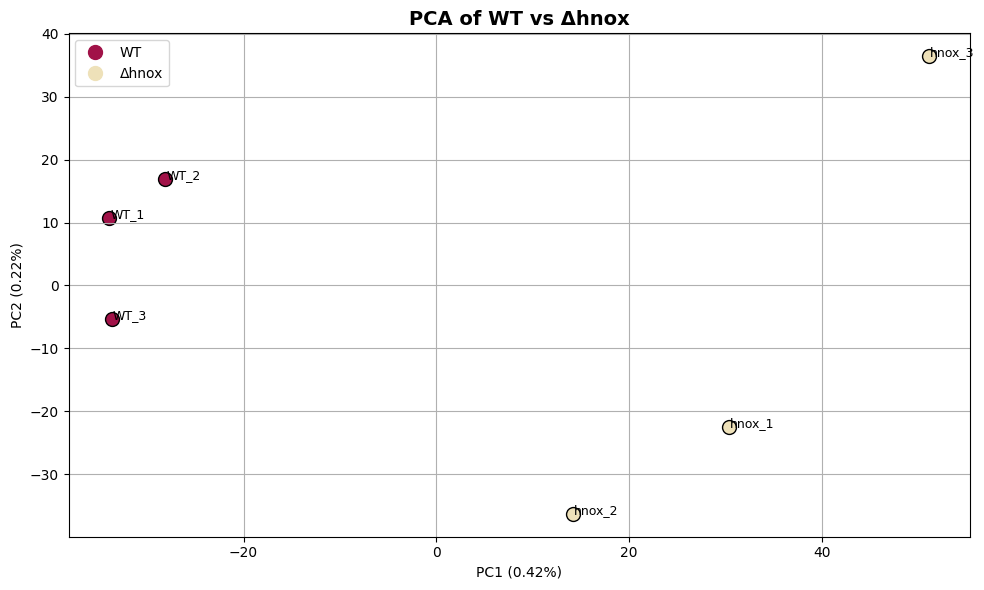

In [6]:
# Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

# Ensure column names are strings for StandardScaler compatibility
transposed_data.columns = transposed_data.columns.astype(str)

# Handle missing values by filling with the mean of each column
transposed_data = transposed_data.fillna(transposed_data.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Sample names corresponding to the transposed rows
sample_names = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

# Define new color map
color_map = {'WT': '#a11248', 'Δhnox': '#eee1b9'}

# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Import mlines for custom legend handles
import matplotlib.lines as mlines

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of WT vs Δhnox', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()

# PC 1 shows that WT strain is very separate from deleted HNOX which shows that there is a global difference between these strsins
# the replicates for each strain are nicely clustered within in PC1 which is shows a 42% variance between WT nad deleted HNOX.